In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sta
import scipy.stats as stats
import pylab as pl

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset

channel  region  fresh   milk  grocery  frozen  detergents_paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
5          2       3   9413   8259     5126     666              1795   
6          2       3  12126   3199     6975     480              3140   
7          2       3   7579   4956     9426    1669              3321   
8          1       3   5963   3648     6192     425              1716   
9          2       3   6006  11093    18881    1159              7425   
10         2       3   3366   5403    12974    4400              5977   
11         2       3  13146   1124     4523    1420               549   
12         2       3  31714  12319    11757     287              3881   
13         2       3  21217   6208    14982    3095              6707   
14         2       3  24653   9465    12091     294              5058   
15         1       3  10253   1114     3821     397               964   
16         2       3   1020   8816    12121     134              4508   
17         1       3   5876   6157     2933     839               370   
18         2       3  18601   6327    10099    2205              2767   
19         1       3   7780   2495     9464     669              2518   
20         2       3  17546   4519     4602    1066              2259   
21         1       3   5567    871     2010    3383               375   
22         1       3  31276   1917     4469    9408              2381   
23         2       3  26373  36423    22019    5154              4337   
24         2       3  22647   9776    13792    2915              4482   
25         2       3  16165   4230     7595     201              4003   
26         1       3   9898    961     2861    3151               242   
27         1       3  14276    803     3045     485               100   
28         2       3   4113  20484    25957    1158              8604   
29         1       3  43088   2100     2609    1200              1107   
..       ...     ...    ...    ...      ...     ...               ...   
410        1       3   6633   2096     4563    1389              1860   
411        1       3   2126   3289     3281    1535               235   
412        1       3     97   3605    12400      98              2970   
413        1       3   4983   4859     6633   17866               912   
414        1       3   5969   1990     3417    5679              1135   
415        2       3   7842   6046     8552    1691              3540   
416        2       3   4389  10940    10908     848              6728   
417        1       3   5065   5499    11055     364              3485   
418        2       3    660   8494    18622     133              6740   
419        1       3   8861   3783     2223     633              1580   
420        1       3   4456   5266    13227      25              6818   
421        2       3  17063   4847     9053    1031              3415   
422        1       3  26400   1377     4172     830               948   
423        2       3  17565   3686     4657    1059              1803   
424        2       3  16980   2884    12232     874              3213   
425        1       3  11243   2408     2593   15348               108   
426        1       3  13134   9347    14316    3141              5079   
427        1       3  31012  16687     5429   15082               439   
428        1       3   3047   5970     4910    2198               850   
429        1       3   8607   1750     3580      47                84   
430        1       3   3097   4230    16483     575               241   
431        1       3   8533   5506     5160   13486              1377   
432        1       3  21117   1162     4754     269            

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
channel             440 non-null int64
region              440 non-null int64
fresh               440 non-null int64
milk                440 non-null int64
grocery             440 non-null int64
frozen              440 non-null int64
detergents_paper    440 non-null int64
delicatessen        440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
print(dataset.shape)

(440, 8)


In [5]:
dataset.iloc[:,2:]

fresh   milk  grocery  frozen  detergents_paper  delicatessen
0    12669   9656     7561     214              2674          1338
1     7057   9810     9568    1762              3293          1776
2     6353   8808     7684    2405              3516          7844
3    13265   1196     4221    6404               507          1788
4    22615   5410     7198    3915              1777          5185
5     9413   8259     5126     666              1795          1451
6    12126   3199     6975     480              3140           545
7     7579   4956     9426    1669              3321          2566
8     5963   3648     6192     425              1716           750
9     6006  11093    18881    1159              7425          2098
10    3366   5403    12974    4400              5977          1744
11   13146   1124     4523    1420               549           497
12   31714  12319    11757     287              3881          2931
13   21217   6208    14982    3095              6707           602
14   24653   9465    12091     294              5058          2168
15   10253   1114     3821     397               964           412
16    1020   8816    12121     134              4508          1080
17    5876   6157     2933     839               370          4478
18   18601   6327    10099    2205              2767          3181
19    7780   2495     9464     669              2518           501
20   17546   4519     4602    1066              2259          2124
21    5567    871     2010    3383               375           569
22   31276   1917     4469    9408              2381          4334
23   26373  36423    22019    5154              4337         16523
24   22647   9776    13792    2915              4482          5778
25   16165   4230     7595     201              4003            57
26    9898    961     2861    3151               242           833
27   14276    803     3045     485               100           518
28    4113  20484    25957    1158              8604          5206
29   43088   2100     2609    1200              1107           823
..     ...    ...      ...     ...               ...           ...
410   6633   2096     4563    1389              1860          1892
411   2126   3289     3281    1535               235          4365
412     97   3605    12400      98              2970            62
413   4983   4859     6633   17866               912          2435
414   5969   1990     3417    5679              1135           290
415   7842   6046     8552    1691              3540          1874
416   4389  10940    10908     848              6728           993
417   5065   5499    11055     364              3485          1063
418    660   8494    18622     133              6740           776
419   8861   3783     2223     633              1580          1521
420   4456   5266    13227      25              6818          1393
421  17063   4847     9053    1031              3415          1784
422  26400   1377     4172     830               948          1218
423  17565   3686     4657    1059              1803           668
424  16980   2884    12232     874              3213           249
425  11243   2408     2593   15348               108          1886
426  13134   9347    14316    3141              5079          1894
427  31012  16687     5429   15082               439          1163
428   3047   5970     4910    2198               850           317
429   8607   1750     3580      47                84          2501
430   3097   4230    16483     575               241          2080
431   8533   5506     5160   13486              1377          1498
432  21117   1162     4754     269              1328           395
433   1982   3218     1493    1541               356          1449
434  16731   3922     7994     688              2371           838
435  29703  12051    16027   13135               182          2204
436  39228   1431      764    4510                93          2346
437  14531  15488    30243     437             14841

In [6]:
# Display a description of the dataset
display(dataset.iloc[:,2:].describe())

fresh          milk       grocery        frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       detergents_paper  delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [7]:
dataset.iloc[:,2:].describe().loc['mean']

fresh               12000.297727
milk                 5796.265909
grocery              7951.277273
frozen               3071.931818
detergents_paper     2881.493182
delicatessen         1524.870455
Name: mean, dtype: float64

# Percentile

In [8]:
print('Percentiles of fresh:')
print(np.percentile(dataset['fresh'], 25))
print(np.percentile(dataset['fresh'], 50))
print(np.percentile(dataset['fresh'], 75))

print('Percentiles of milk:')
print(np.percentile(dataset['milk'], 25))
print(np.percentile(dataset['milk'], 50))
print(np.percentile(dataset['milk'], 75))

print('Percentiles of grocery:')
print(np.percentile(dataset['grocery'], 25))
print(np.percentile(dataset['grocery'], 50))
print(np.percentile(dataset['grocery'], 75))

print('Percentiles of frozen:')
print(np.percentile(dataset['frozen'], 25))
print(np.percentile(dataset['frozen'], 50))
print(np.percentile(dataset['frozen'], 75))

print('Percentiles of detergents_paper:')
print(np.percentile(dataset['detergents_paper'], 25))
print(np.percentile(dataset['detergents_paper'], 50))
print(np.percentile(dataset['detergents_paper'], 75))

print('Percentiles of delicatessen:')
print(np.percentile(dataset['delicatessen'], 25))
print(np.percentile(dataset['delicatessen'], 50))
print(np.percentile(dataset['delicatessen'], 75))

Percentiles of fresh:
3127.75
8504.0
16933.75
Percentiles of milk:
1533.0
3627.0
7190.25
Percentiles of grocery:
2153.0
4755.5
10655.75
Percentiles of frozen:
742.25
1526.0
3554.25
Percentiles of detergents_paper:
256.75
816.5
3922.0
Percentiles of delicatessen:
408.25
965.5
1820.25


In [9]:
print('Mean - Mode - Median - Standard Deviation - Variance: fresh')
print(sta.mean(dataset['fresh'].dropna()))
print(sta.median(dataset['fresh'].dropna()))
print(sta.stdev(dataset['fresh'].dropna()))
print(sta.variance(dataset['fresh'].dropna()))

print('Mean - Mode - Median - Standard Deviation - Variance: milk')
print(sta.mean(dataset['milk'].dropna()))
print(sta.median(dataset['milk'].dropna()))
print(sta.stdev(dataset['milk'].dropna()))
print(sta.variance(dataset['milk'].dropna()))

print('Mean - Mode - Median - Standard Deviation - Variance: grocery')
print(sta.mean(dataset['grocery'].dropna()))
print(sta.median(dataset['grocery'].dropna()))
print(sta.stdev(dataset['grocery'].dropna()))
print(sta.variance(dataset['grocery'].dropna()))

print('Mean - Mode - Median - Standard Deviation - Variance: frozen')
print(sta.mean(dataset['frozen'].dropna()))
print(sta.median(dataset['frozen'].dropna()))
print(sta.stdev(dataset['frozen'].dropna()))
print(sta.variance(dataset['frozen'].dropna()))

print('Mean - Mode - Median - Standard Deviation - Variance: detergents_paper')
print(sta.mean(dataset['detergents_paper'].dropna()))
print(sta.median(dataset['detergents_paper'].dropna()))
print(sta.stdev(dataset['detergents_paper'].dropna()))
print(sta.variance(dataset['detergents_paper'].dropna()))

print('Mean - Mode - Median - Standard Deviation - Variance: delicatessen')
print(sta.mean(dataset['delicatessen'].dropna()))
print(sta.median(dataset['delicatessen'].dropna()))
print(sta.stdev(dataset['delicatessen'].dropna()))
print(sta.variance(dataset['delicatessen'].dropna()))

Mean - Mode - Median - Standard Deviation - Variance: fresh
12000.297727272728
8504.0
12647.32886507689
159954927.4214071
Mean - Mode - Median - Standard Deviation - Variance: milk
5796.265909090909
3627.0
7380.377174570842
54469967.238926284
Mean - Mode - Median - Standard Deviation - Variance: grocery
7951.277272727273
4755.5
9503.162828994344
90310103.7543798
Mean - Mode - Median - Standard Deviation - Variance: frozen
3071.931818181818
1526.0
4854.673332592367
23567853.166183475
Mean - Mode - Median - Standard Deviation - Variance: detergents_paper
2881.4931818181817
816.5
4767.854447904201
22732436.036399875
Mean - Mode - Median - Standard Deviation - Variance: delicatessen
1524.8704545454545
965.5
2820.105937369397
7952997.497986126


In [10]:
# seaborn histogram
sns.distplot(dataset['fresh'].dropna())
plt.title('Histograms of fresh')

/home/xuanphu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histograms of fresh')

In [11]:
# seaborn histogram
sns.distplot(dataset['milk'].dropna())
plt.title('Histograms of milk')

Text(0.5, 1.0, 'Histograms of milk')

In [12]:
# seaborn histogram
sns.distplot(dataset['grocery'].dropna())
plt.title('Histograms of grocery')

Text(0.5, 1.0, 'Histograms of grocery')

In [13]:
# seaborn histogram
sns.distplot(dataset['frozen'].dropna())
plt.title('Histograms of frozen')

Text(0.5, 1.0, 'Histograms of frozen')

Text(0.5, 1.0, 'Histograms of detergents_paper')

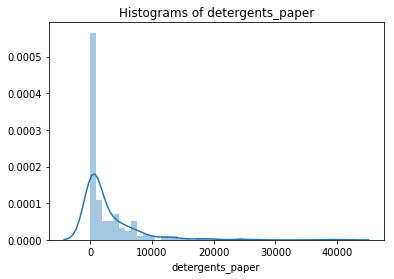

In [14]:
# seaborn histogram
sns.distplot(dataset['detergents_paper'].dropna())
plt.title('Histograms of detergents_paper')

In [15]:
# seaborn histogram
sns.distplot(dataset['delicatessen'].dropna())
plt.title('Histograms of delicatessen')

Text(0.5, 1.0, 'Histograms of delicatessen')

In [16]:
# List of six products to plot
products = dataset.iloc[:,2:].columns

# Iterate through the six products
for product in products:
    sns.distplot(dataset[product].dropna(),hist = False, kde = True, kde_kws = {'linewidth': 2}, label = product)
    
# Plot formatting
#plt.style.use("ggplot")
#plt.rcParams["figure.figsize"] = [10, 8]
plt.legend(prop = {'size' : 10}, title = 'Product')
plt.title('Density Plot with Multiple products')
plt.xlabel('The amount of product')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

In [17]:
products = dataset.iloc[:,2:].columns
# Iterate through the six products
for i in range(5):
    for product in products[i+1:6]:
        print('The correlation', (products[i]), 'and', (product))
        print(np.corrcoef(dataset[products[i]],dataset[product]))

The correlation fresh and milk
[[1.         0.10050977]
 [0.10050977 1.        ]]
The correlation fresh and grocery
[[ 1.         -0.01185387]
 [-0.01185387  1.        ]]
The correlation fresh and frozen
[[1.         0.34588146]
 [0.34588146 1.        ]]
The correlation fresh and detergents_paper
[[ 1.         -0.10195294]
 [-0.10195294  1.        ]]
The correlation fresh and delicatessen
[[1.         0.24468997]
 [0.24468997 1.        ]]
The correlation milk and grocery
[[1.         0.72833512]
 [0.72833512 1.        ]]
The correlation milk and frozen
[[1.         0.12399376]
 [0.12399376 1.        ]]
The correlation milk and detergents_paper
[[1.         0.66181568]
 [0.66181568 1.        ]]
The correlation milk and delicatessen
[[1.         0.40636832]
 [0.40636832 1.        ]]
The correlation grocery and frozen
[[ 1.         -0.04019274]
 [-0.04019274  1.        ]]
The correlation grocery and detergents_paper
[[1.         0.92464069]
 [0.92464069 1.        ]]
The correlation grocer

In [18]:
products = dataset.iloc[:,2:].columns
print(products)
products[5]

Index(['fresh', 'milk', 'grocery', 'frozen', 'detergents_paper',
       'delicatessen'],
      dtype='object')


'delicatessen'

/home/xuanphu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


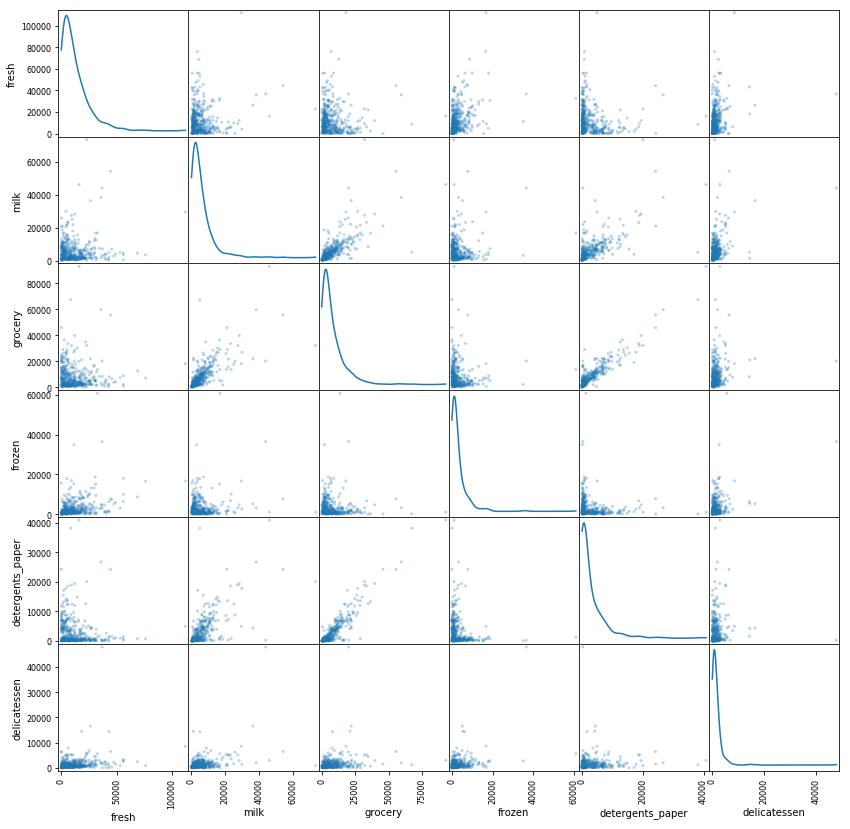

In [19]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(dataset.iloc[:,2:], alpha = 0.3, figsize = (14,14), diagonal = 'kde');

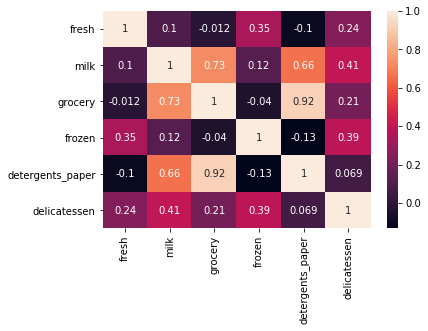

In [20]:
sns.heatmap(dataset.iloc[:,2:].corr(), annot=True)

# Find Outliers 

In [21]:
outliers=[]

# For each feature find the data points with extreme high or low values
for feature in dataset.iloc[:,2:].columns:
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(dataset.iloc[:,2:][feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(dataset.iloc[:,2:][feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= dataset.iloc[:,2:][~((dataset.iloc[:,2:][feature] >= Q1 - step) & (dataset.iloc[:,2:][feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist() 

Outlier step: 20709.0
Data points considered outliers for the feature 'fresh':


fresh   milk  grocery  frozen  detergents_paper  delicatessen
29    43088   2100     2609    1200              1107           823
39    56159    555      902   10002               212          2916
47    44466  54259    55571    7782             24171          6465
52    40721   3916     5876     532              2587          1278
87    43265   5025     8117    6312              1579         14351
103   56082   3504     8906   18028              1480          2498
125   76237   3473     7102   16538               778           918
129   42312    926     1510    1718               410          1819
176   45640   6958     6536    7368              1532           230
181  112151  29627    18148   16745              4948          8550
239   47493   2567     3779    5243               828          2253
258   56083   4563     2124    6422               730          3321
259   53205   4959     7336    3012               967           818
282   49063   3965     4252    5970              1041          1404
284   68951   4411    12609    8692               751          2406
285   40254    640     3600    1042               436            18
289   42786    286      471    1388                32            22
370   39679   3944     4955    1364               523          2235
377   38793   3154     2648    1034                96          1242
436   39228   1431      764    4510                93          2346

Outlier step: 8485.875
Data points considered outliers for the feature 'milk':


fresh   milk  grocery  frozen  detergents_paper  delicatessen
23    26373  36423    22019    5154              4337         16523
28     4113  20484    25957    1158              8604          5206
38     4591  15729    16709      33              6956           433
45     5181  22044    21531    1740              7353          4985
47    44466  54259    55571    7782             24171          6465
49     4967  21412    28921    1798             13583          1163
56     4098  29892    26866    2616             17740          1340
61    35942  38369    59598    3254             26701          2017
65       85  20959    45828      36             24231          1423
85    16117  46197    92780    1026             40827          2944
86    22925  73498    32114     987             20070           903
92     9198  27472    32034    3232             18906          5130
109    1406  16729    28986     673               836             3
163    5531  15726    26870    2367             13726           446
171     200  25862    19816     651              8773          6250
181  112151  29627    18148   16745              4948          8550
183   36847  43950    20170   36534               239         47943
211   12119  28326    39694    4736             19410          2870
216    2532  16599    36486     179             13308           674
251    6134  23133    33586    6746             18594          5121
254   10379  17972     4748    4686              1547          3265
265    5909  23527    13699   10155               830          3636
309     918  20655    13567    1465              6846           806
319    9759  25071    17645    1128             12408          1625
325   32717  16784    13626   60869              1272          5609
358     759  18664     1660    6114               536          4100
384   10683  21858    15400    3635               282          5120
427   31012  16687     5429   15082               439          1163

Outlier step: 12754.125
Data points considered outliers for the feature 'grocery':


fresh   milk  grocery  frozen  detergents_paper  delicatessen
28    4113  20484    25957    1158              8604          5206
43     630  11095    23998     787              9529            72
47   44466  54259    55571    7782             24171          6465
49    4967  21412    28921    1798             13583          1163
56    4098  29892    26866    2616             17740          1340
61   35942  38369    59598    3254             26701          2017
65      85  20959    45828      36             24231          1423
77   12205  12697    28540     869             12034          1009
85   16117  46197    92780    1026             40827          2944
86   22925  73498    32114     987             20070           903
92    9198  27472    32034    3232             18906          5130
109   1406  16729    28986     673               836             3
145  22039   8384    34792      42             12591          4430
163   5531  15726    26870    2367             13726           446
201   4484  14399    24708    3549             14235          1681
205   1107  11711    23596     955              9265           710
211  12119  28326    39694    4736             19410          2870
216   2532  16599    36486     179             13308           674
251   6134  23133    33586    6746             18594          5121
304    161   7460    24773     617             11783          2410
331  11223  14881    26839    1234              9606          1102
333   8565   4980    67298     131             38102          1215
343   1689   6964    26316    1456             15469            37
437  14531  15488    30243     437             14841          1867

Outlier step: 4218.0
Data points considered outliers for the feature 'frozen':


fresh   milk  grocery  frozen  detergents_paper  delicatessen
22    31276   1917     4469    9408              2381          4334
39    56159    555      902   10002               212          2916
40    24025   4332     4757    9510              1145          5864
47    44466  54259    55571    7782             24171          6465
70    16705   2037     3202   10643               116          1365
72     4420   5139     2661    8872              1321           181
73    19899   5332     8713    8132               764           648
88     7864    542     4042    9735               165            46
91    12754   2762     2530    8693               627          1117
93    11314   3090     2062   35009                71          2698
103   56082   3504     8906   18028              1480          2498
112   19046   2770     2469    8853               483          2708
125   76237   3473     7102   16538               778           918
126   19219   1840     1658    8195               349           483
143   10405   1596     1096    8425               399           318
181  112151  29627    18148   16745              4948          8550
183   36847  43950    20170   36534               239         47943
195   17023   5139     5230    7888               330          1755
196   30624   7209     4897   18711               763          2876
230   11072   5989     5615    8321               955          2137
240   22096   3575     7041   11422               343          2564
265    5909  23527    13699   10155               830          3636
277    9061    829      683   16919               621           139
283   25767   3613     2013   10303               314          1384
284   68951   4411    12609    8692               751          2406
287   15354   2102     2828    8366               386          1027
310    7034   1492     2405   12569               299          1117
325   32717  16784    13626   60869              1272          5609
328   16933   2209     3389    7849               210          1534
334   16823    928     2743   11559               332          3486
337    9351   1347     2611    8170               442           868
338       3    333     7021   15601                15           550
339    2617   1188     5332    9584               573          1942
371   20105   1887     1939    8164               716           790
381   17770   4591     1617    9927               246           532
393   23632   6730     3842    8620               385           819
401   27167   2801     2128   13223                92          1902
406   25066   5010     5026    9806              1092           960
413    4983   4859     6633   17866               912          2435
425   11243   2408     2593   15348               108          1886
427   31012  16687     5429   15082               439          1163
431    8533   5506     5160   13486              1377          1498
435   29703  12051    16027   13135               182          2204

Outlier step: 5497.875
Data points considered outliers for the feature 'detergents_paper':


fresh   milk  grocery  frozen  detergents_paper  delicatessen
43     630  11095    23998     787              9529            72
47   44466  54259    55571    7782             24171          6465
49    4967  21412    28921    1798             13583          1163
56    4098  29892    26866    2616             17740          1340
61   35942  38369    59598    3254             26701          2017
65      85  20959    45828      36             24231          1423
77   12205  12697    28540     869             12034          1009
85   16117  46197    92780    1026             40827          2944
86   22925  73498    32114     987             20070           903
92    9198  27472    32034    3232             18906          5130
145  22039   8384    34792      42             12591          4430
155   1989  10690    19460     233             11577          2153
163   5531  15726    26870    2367             13726           446
173    514   7677    19805     937              9836           716
200   3067  13240    23127    3941              9959           731
201   4484  14399    24708    3549             14235          1681
209   5550  12729    16767     864             12420           797
211  12119  28326    39694    4736             19410          2870
216   2532  16599    36486     179             13308           674
251   6134  23133    33586    6746             18594          5121
303   2599   3688    13829     492             10069            59
304    161   7460    24773     617             11783          2410
312   2137   3737    19172    1274             17120           142
319   9759  25071    17645    1128             12408          1625
331  11223  14881    26839    1234              9606          1102
333   8565   4980    67298     131             38102          1215
343   1689   6964    26316    1456             15469            37
349   5981  14641    20521    2005             12218           445
351   1210  10044    22294    1741             12638          3137
437  14531  15488    30243     437             14841          1867

Outlier step: 2118.0
Data points considered outliers for the feature 'delicatessen':


fresh   milk  grocery  frozen  detergents_paper  delicatessen
2      6353   8808     7684    2405              3516          7844
4     22615   5410     7198    3915              1777          5185
17     5876   6157     2933     839               370          4478
22    31276   1917     4469    9408              2381          4334
23    26373  36423    22019    5154              4337         16523
24    22647   9776    13792    2915              4482          5778
28     4113  20484    25957    1158              8604          5206
36    29955   4362     5428    1729               862          4626
40    24025   4332     4757    9510              1145          5864
45     5181  22044    21531    1740              7353          4985
47    44466  54259    55571    7782             24171          6465
71    18291   1266    21042    5373              4173         14472
87    43265   5025     8117    6312              1579         14351
92     9198  27472    32034    3232             18906          5130
145   22039   8384    34792      42             12591          4430
171     200  25862    19816     651              8773          6250
181  112151  29627    18148   16745              4948          8550
183   36847  43950    20170   36534               239         47943
202   25203  11487     9490    5065               284          6854
218      18   7504    15205    1285              4797          6372
251    6134  23133    33586    6746             18594          5121
325   32717  16784    13626   60869              1272          5609
358     759  18664     1660    6114               536          4100
372    3884   3801     1641     876               397          4829
384   10683  21858    15400    3635               282          5120
409    8708   3634     6100    2349              2123          5137
411    2126   3289     3281    1535               235          4365

In [22]:
# Remove the outliers, if any were specified
good_dataset = dataset.drop(dataset.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_dataset.shape))

Number of outliers (inc duplicates):  172
New dataset with removed outliers has 332 samples with 8 features each.


In [23]:
good_dataset

channel  region  fresh   milk  grocery  frozen  detergents_paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          1       3  13265   1196     4221    6404               507   
3          2       3   9413   8259     5126     666              1795   
4          2       3  12126   3199     6975     480              3140   
5          2       3   7579   4956     9426    1669              3321   
6          1       3   5963   3648     6192     425              1716   
7          2       3   6006  11093    18881    1159              7425   
8          2       3   3366   5403    12974    4400              5977   
9          2       3  13146   1124     4523    1420               549   
10         2       3  31714  12319    11757     287              3881   
11         2       3  21217   6208    14982    3095              6707   
12         2       3  24653   9465    12091     294              5058   
13         1       3  10253   1114     3821     397               964   
14         2       3   1020   8816    12121     134              4508   
15         2       3  18601   6327    10099    2205              2767   
16         1       3   7780   2495     9464     669              2518   
17         2       3  17546   4519     4602    1066              2259   
18         1       3   5567    871     2010    3383               375   
19         2       3  16165   4230     7595     201              4003   
20         1       3   9898    961     2861    3151               242   
21         1       3  14276    803     3045     485               100   
22         1       3  18815   3610    11107    1148              2134   
23         1       3   2612   4339     3133    2088               820   
24         1       3  21632   1318     2886     266               918   
25         1       3  29729   4786     7326    6130               361   
26         1       3   1502   1979     2262     425               483   
27         2       3    688   5491    11091     833              4239   
28         2       3  15168  10556    12477    1920              6506   
29         1       3  19176   3065     5956    2033              2575   
..       ...     ...    ...    ...      ...     ...               ...   
302        1       3   9612    577      935    1601               469   
303        1       3   4446    906     1238    3576               153   
304        1       3  26539   4753     5091     220                10   
305        1       3  25606  11006     4604     127               632   
306        1       3  18073   4613     3444    4324               914   
307        1       3   6884   1046     1167    2069               593   
308        2       3   7362  12844    18683    2854              7883   
309        2       3   8257   3880     6407    1646              2730   
310        1       3   6633   2096     4563    1389              1860   
311        1       3     97   3605    12400      98              2970   
312        1       3   5969   1990     3417    5679              1135   
313        2       3   7842   6046     8552    1691              3540   
314        2       3   4389  10940    10908     848              6728   
315        1       3   5065   5499    11055     364              3485   
316        2       3    660   8494    18622     133              6740   
317        1       3   8861   3783     2223     633              1580   
318        1       3   4456   5266    13227      25              6818   
319        2       3  17063   4847     9053    1031              3415   
320        1       3  26400   1377     4172     830               948   
321        2       3  17565   3686     4657    1059              1803   
322        2       3  16980   2884    12232     874              3213   
323        1       3  13134   9347    14316    3141              5079   
324        1       3   3047   5970     4910    2198            

In [24]:
# Display a description of the dataset
display(good_dataset.iloc[:,2:].describe())

fresh          milk       grocery       frozen  \
count    332.000000    332.000000    332.000000   332.000000   
mean    9547.397590   4105.180723   5875.614458  1863.048193   
std     8161.831206   3363.303146   5038.930756  1707.890373   
min        3.000000     55.000000      3.000000    25.000000   
25%     2989.750000   1352.500000   2011.500000   582.000000   
50%     7483.500000   3087.000000   3835.500000  1270.500000   
75%    13987.250000   6251.750000   8928.500000  2587.500000   
max    37036.000000  14982.000000  22272.000000  7683.000000   

       detergents_paper  delicatessen  
count        332.000000    332.000000  
mean        1958.975904   1016.602410  
std         2347.470292    824.356784  
min            3.000000      3.000000  
25%          231.750000    360.750000  
50%          715.500000    774.000000  
75%         3461.250000   1456.000000  
max         8969.000000   3637.000000

Text(0, 0.5, 'Density')

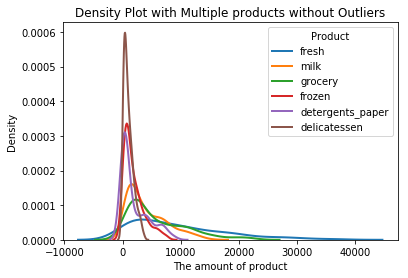

In [25]:
# List of six products to plot
products = good_dataset.iloc[:,2:].columns

# Iterate through the six products
for product in products:
    sns.distplot(good_dataset[product].dropna(),hist = False, kde = True, kde_kws = {'linewidth': 2}, label = product)
    
# Plot formatting
#plt.style.use("ggplot")
#plt.rcParams["figure.figsize"] = [10, 8]
plt.legend(prop = {'size' : 10}, title = 'Product')
plt.title('Density Plot with Multiple products without Outliers')
plt.xlabel('The amount of product')
plt.ylabel('Density')

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, Normalizer
#sc_X = Normalizer()
sc_X = StandardScaler()
scaled_dataset = sc_X.fit_transform(good_dataset.iloc[:,2:])
scaled_dataset

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.38304079,  1.65289825,  0.33497772, -0.96700429,  0.30505322,
         0.3904653 ],
       [-0.30558788,  1.69875568,  0.73387771, -0.05925481,  0.56913935,
         0.92259064],
       [ 0.45617384, -0.86628288, -0.32886183,  2.66282084, -0.61946154,
         0.93716941],
       ...,
       [ 0.88147444, -0.05454674,  0.42103835, -0.68904999,  0.17578328,
        -0.21698372],
       [ 0.09112211, -0.63252908, -0.72418424, -0.48380948, -0.76409029,
         1.34659005],
       [-0.82954447, -0.71679956, -0.66893053, -1.05437811, -0.63226055,
        -1.17189357]])

In [27]:
good_dataset.iloc[:,2:] = scaled_dataset

In [28]:
good_dataset

channel  region     fresh      milk   grocery    frozen  \
0          2       3  0.383041  1.652898  0.334978 -0.967004   
1          2       3 -0.305588  1.698756  0.733878 -0.059255   
2          1       3  0.456174 -0.866283 -0.328862  2.662821   
3          2       3 -0.016491  1.236906 -0.148989 -0.701951   
4          2       3  0.316411 -0.269838  0.218508 -0.811022   
5          2       3 -0.241535  0.253353  0.705655 -0.113790   
6          1       3 -0.439829 -0.136137  0.062883 -0.843274   
7          2       3 -0.434552  2.080802  2.584877 -0.412855   
8          2       3 -0.758497  0.386459  1.410835  1.487672   
9          2       3  0.441572 -0.887723 -0.268838 -0.259804   
10         2       3  2.719985  2.445875  1.168951 -0.924197   
11         2       3  1.431936  0.626168  1.809934  0.722418   
12         2       3  1.853555  1.596023  1.235335 -0.920092   
13         1       3  0.086582 -0.890700 -0.408364 -0.859693   
14         2       3 -1.046367  1.402767  1.241298 -1.013916   
15         2       3  1.110936  0.661603  0.839416  0.200521   
16         1       3 -0.216871 -0.479472  0.713207 -0.700192   
17         2       3  0.981480  0.123225 -0.253136 -0.467390   
18         1       3 -0.488421 -0.963060 -0.768308  0.891302   
19         2       3  0.812023  0.037168  0.341735 -0.974628   
20         1       3  0.043021 -0.936260 -0.599168  0.755257   
21         1       3  0.580230 -0.983309 -0.562597 -0.808089   
22         1       3  1.137195 -0.147453  1.039761 -0.419305   
23         1       3 -0.851018  0.069626 -0.545107  0.131912   
24         1       3  1.482859 -0.829954 -0.594199 -0.936511   
25         1       3  2.476413  0.202731  0.288270  2.502147   
26         1       3 -0.987222 -0.633125 -0.718222 -0.843274   
27         2       3 -1.087105  0.412663  1.036581 -0.604022   
28         2       3  0.689684  1.920896  1.312054  0.033397   
29         1       3  1.181492 -0.309740  0.015977  0.099660   
..       ...     ...       ...       ...       ...       ...   
302        1       3  0.007927 -1.050606 -0.981969 -0.153665   
303        1       3 -0.625974 -0.952638 -0.921746  1.004477   
304        1       3  2.084979  0.192905 -0.155946 -0.963486   
305        1       3  1.970494  2.054895 -0.252739 -1.018021   
306        1       3  1.046147  0.151216 -0.483294  1.443106   
307        1       3 -0.326816 -0.910949 -0.935858  0.120770   
308        2       3 -0.268162  2.602207  2.545524  0.581096   
309        2       3 -0.158340 -0.067053  0.105615 -0.127277   
310        1       3 -0.357615 -0.598285 -0.260888 -0.277983   
311        1       3 -1.159625 -0.148942  1.296750 -1.035027   
312        1       3 -0.439093 -0.629849 -0.488660  2.237680   
313        2       3 -0.209263  0.577929  0.531943 -0.100889   
314        2       3 -0.632969  2.035242  1.000209 -0.595226   
315        1       3 -0.550019  0.415045  1.029425 -0.879044   
316        2       3 -1.090541  1.306883  2.533400 -1.014503   
317        1       3 -0.084225 -0.095938 -0.725973 -0.721302   
318        1       3 -0.624747  0.345664  1.461120 -1.077834   
319        2       3  0.922213  0.220896  0.631519 -0.487914   
320        1       3  2.067923 -0.812386 -0.338601 -0.605781   
321        2       3  0.983812 -0.124822 -0.242205 -0.471495   
322        2       3  0.912028 -0.363638  1.263359 -0.579979   
323        1       3  0.440099  1.560886  1.677563  0.749393   
324        1       3 -0.797641  0.555298 -0.191920  0.196416   
325        1       3 -0.115393 -0.701315 -0.456263 -1.064933   
326        1       3 -0.791505  0.037168  2.108264 -0.755313   
327        1       3  1.419665 -0.876407 -0.222926 -0.934752   
328        1       3 -0.928323 -0.264181 -0.871064 -0.188850   
329        1       3  0.881474 -0.054547  0.421038 -0.689050   
330        1       3  0.091122 -0.632529 -0.724184 -0.483809   
331        1       3 -0.829544 -0.716800 -0.668931 -1.054378   

     detergents_paper  delicatessen 

Text(0, 0.5, 'Density')

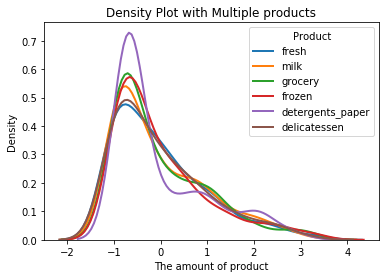

In [29]:
# List of six products to plot
products = good_dataset.iloc[:,2:].columns

# Iterate through the six products
for product in products:
    sns.distplot(good_dataset[product].dropna(),hist = False, kde = True, kde_kws = {'linewidth': 2}, label = product)
    
# Plot formatting
#plt.style.use("ggplot")
#plt.rcParams["figure.figsize"] = [10, 8]
plt.legend(prop = {'size' : 10}, title = 'Product')
plt.title('Density Plot with Multiple products')
plt.xlabel('The amount of product')
plt.ylabel('Density')

In [30]:
 pd.DataFrame(good_dataset).to_csv("good_dataset.csv",index=False,header=True)